# Lab 4: Clustering (Part 2)

**(Part 2 of 3)**   
By **Jackie Kazil** | Lab Assignment 4 | CSS 739, Spring 2015 | GeoSocial Analysis

### Question 2: How each clustering works (cont)
The three appraoches that were used are K-means, **Agglomerative**, and Affinity Propagation.

To interact with the data in this notebook, visit the interactive version in its respective notebook.
* [Lab 4: Clustering (Part 1)](http://nbviewer.ipython.org/github/jackiekazil/assignments/blob/master/css/geosocial/lab4-clustering/Lab%204%20-%20Clustering.ipynb) - K-means
* [Lab 4: Clustering (Part 2)](http://nbviewer.ipython.org/github/jackiekazil/assignments/blob/master/css/geosocial/lab4-clustering/Lab%204%20-%20Clustering-Part%202.ipynb) - Agglomerative
* [Lab 4: Clustering (Part 3)](http://nbviewer.ipython.org/github/jackiekazil/assignments/blob/master/css/geosocial/lab4-clustering/Lab%204%20-%20Clustering-Part%203.ipynb) - Affinity Progation

#### Agglomerative Clustering
Agglomerative clustering is a heirachical means of clustering points. The numbers of clusters is determined by how much you cluster items together. The individual points begin in a cluster of one. Then, points that are near each other are clustered together. Those clusters are clustered with the closest clusters. According to the [scikit-learn documentation](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering), it is summed up as, "Recursively merges the pair of clusters that minimally increases a given linkage distance." 

Let's see this in action. To start the process, first we load the data from the CSV file into a dataframe.

In [1]:
import matplotlib
%matplotlib inline

import pandas as pd
df = pd.read_csv('Olympic_torch_2012_UK.csv')

##### Settting up the function to apply agglomerative clustering

While I did most of my work with K-means using latitude and longtitude for clustering, for this clustering approach I first experimented with setting the 'date' values as the clustering factor. For a spatial comparison, this didn't bring any great relavation and as you can see in the code below, the format of the date and time was converted into seconds for an easier comparison.

In [2]:
import time
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering

# Convert date and time to seconds for clustering.
try:
    time_format = "%Y-%m-%d %H:%M:%S %Z"
    df['date'] = df['date'].apply(lambda x: time.mktime(time.strptime(str(x), time_format)))
except ValueError:
    pass

def graph_agglo(clusters, affinity="euclidean", lookup_keys=['date']):
    model = AgglomerativeClustering(n_clusters=clusters, linkage="average", affinity=affinity)
    output = model.fit(df[lookup_keys]).labels_
    fig, ax = plt.subplots(figsize=(5, 5),
                           subplot_kw={'axisbg':'#EEEEEE',
                                       'axisbelow':True})
    ax.scatter(df['longitude'], df['latitude'], c=output)
    return fig

Next, I attempted a basic approach using each of the affinity type settings. Euclidean and city block seem to very similar. Cosine didn't seem to be helpful for this dataset, so I decided to focus on just Euclidean. 

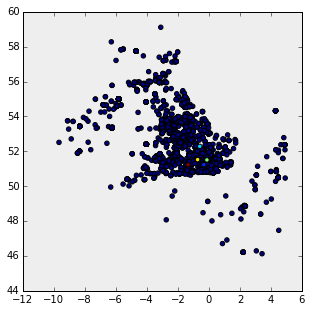

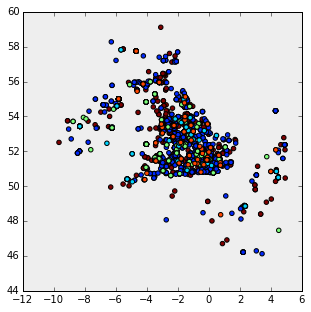

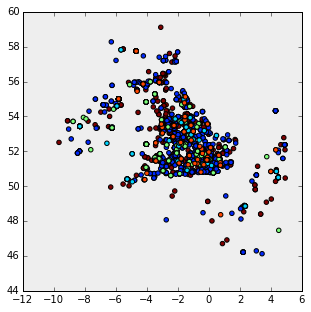

In [5]:
for affinity in ["cosine", "euclidean", "cityblock"]:
    graph_agglo(7, affinity)

Next, I tried to set the date as a range. While, I ended up focusing on the spatial relationships, I thought the clustering patterns for the graph below which clusters on date had interesting results when set to three or four clusters. Some of the clustering patterns appear to create red lines in between bloches of blue clusters.

In [16]:
from ipywidgets import StaticInteract, RangeWidget

StaticInteract(graph_agglo,
               clusters = RangeWidget(1, 10, 1),)

Then I experimented with latitude and longitude. I found that a cluster setting of eight seemed interesting in comparison to the k-means division of eight clusters.

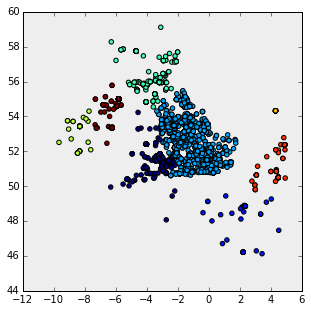

In [13]:
graph_agglo(8, "euclidean", lookup_keys=['longitude','latitude'])

Use the map below to see the boundaries of the agglomerative clustering of the dataset. (Compare this the k-means version, which is in the first notebook.)

In [3]:
import mplleaflet
mplleaflet.display(fig=graph_agglo(8, "euclidean", lookup_keys=['longitude','latitude']))